# MLOPS Project


In [ ]:
from warnings import filterwarnings

filterwarnings("ignore")

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("train.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [4]:
df = df.drop(columns=["Booking_ID"])
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

### Basic Data quality checks


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29020 non-null  int64  
 1   no_of_children                        29020 non-null  int64  
 2   no_of_weekend_nights                  29020 non-null  int64  
 3   no_of_week_nights                     29020 non-null  int64  
 4   type_of_meal_plan                     29020 non-null  object 
 5   required_car_parking_space            29020 non-null  int64  
 6   room_type_reserved                    29020 non-null  object 
 7   lead_time                             29020 non-null  int64  
 8   arrival_year                          29020 non-null  int64  
 9   arrival_month                         29020 non-null  int64  
 10  arrival_date                          29020 non-null  int64  
 11  market_segment_

In [6]:
df.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(7661)

In [8]:
df.shape

(29020, 18)

In [9]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape

(21359, 18)

In [10]:
import matplotlib.pyplot as plt

In [11]:
unique_cols = df.columns[df.nunique() <= 20]
unique_cols

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'arrival_year', 'arrival_month',
       'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [12]:
df[unique_cols].dtypes

no_of_adults                     int64
no_of_children                   int64
no_of_weekend_nights             int64
no_of_week_nights                int64
type_of_meal_plan               object
required_car_parking_space       int64
room_type_reserved              object
arrival_year                     int64
arrival_month                    int64
market_segment_type             object
repeated_guest                   int64
no_of_previous_cancellations     int64
no_of_special_requests           int64
booking_status                  object
dtype: object

In [13]:
other_cols = df.columns[df.nunique() > 20]
other_cols

Index(['lead_time', 'arrival_date', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room'],
      dtype='object')

In [14]:
df[other_cols].dtypes

lead_time                                 int64
arrival_date                              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
dtype: object

Column name : no_of_adults
no_of_adults
2    15489
1     3996
3     1748
0      113
4       13
Name: count, dtype: int64


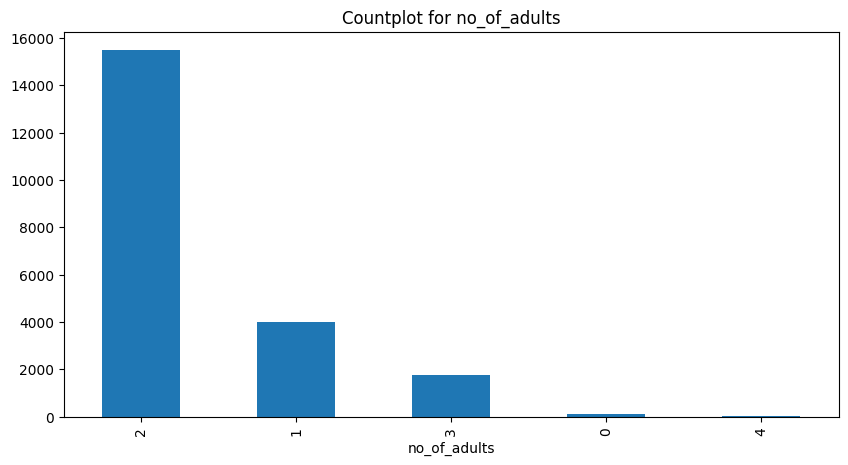



Column name : no_of_children
no_of_children
0     19251
1      1257
2       837
3        11
9         2
10        1
Name: count, dtype: int64


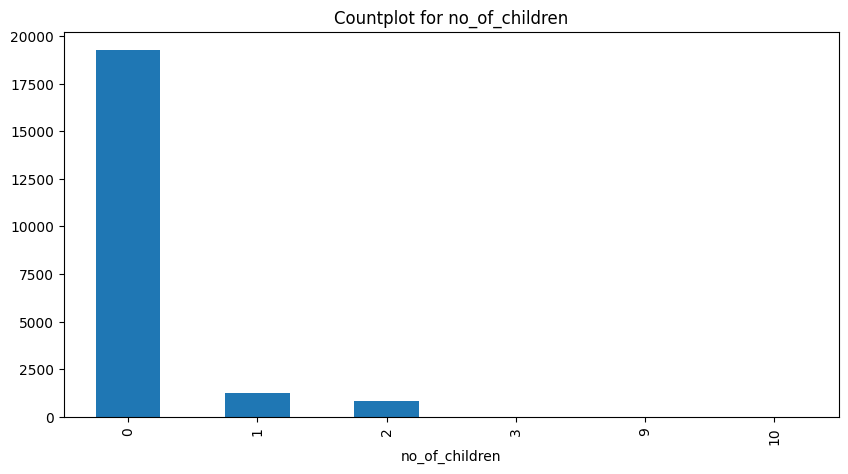



Column name : no_of_weekend_nights
no_of_weekend_nights
0    9178
1    6063
2    5882
3     110
4      91
5      21
6      14
Name: count, dtype: int64


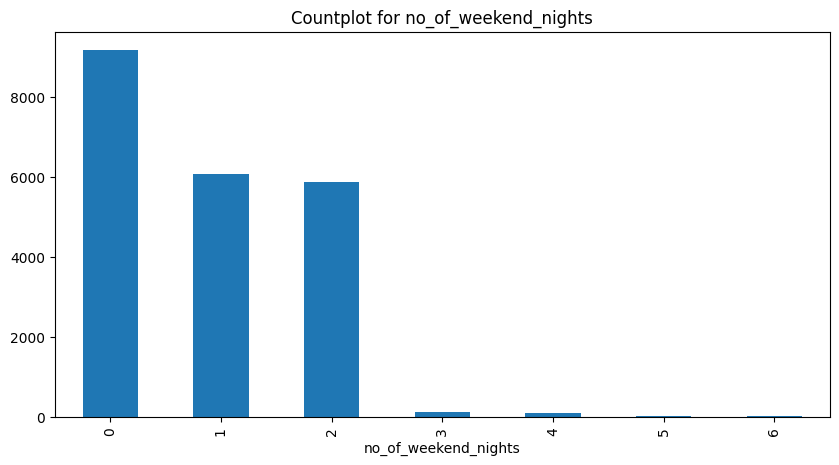



Column name : no_of_week_nights
no_of_week_nights
2     5894
1     5833
3     4628
4     1980
0     1492
5     1169
6      136
7       81
8       43
10      41
9       24
11      12
15       7
12       6
14       5
13       4
16       2
17       2
Name: count, dtype: int64


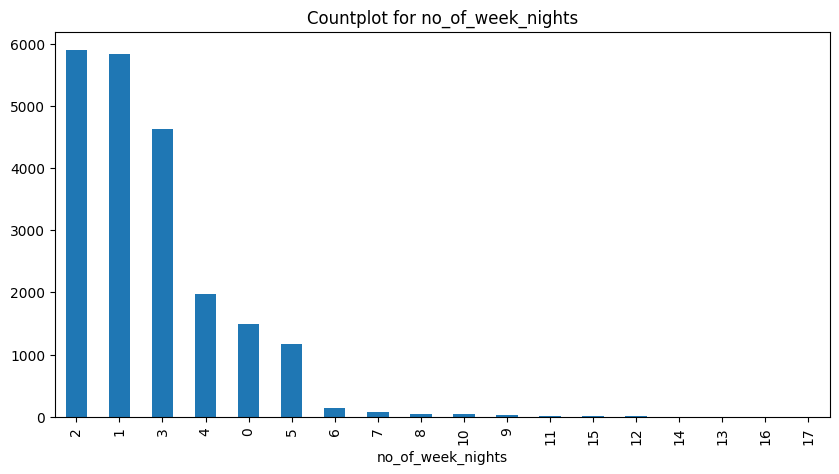



Column name : type_of_meal_plan
type_of_meal_plan
Meal Plan 1     16759
Not Selected     3627
Meal Plan 2       969
Meal Plan 3         4
Name: count, dtype: int64


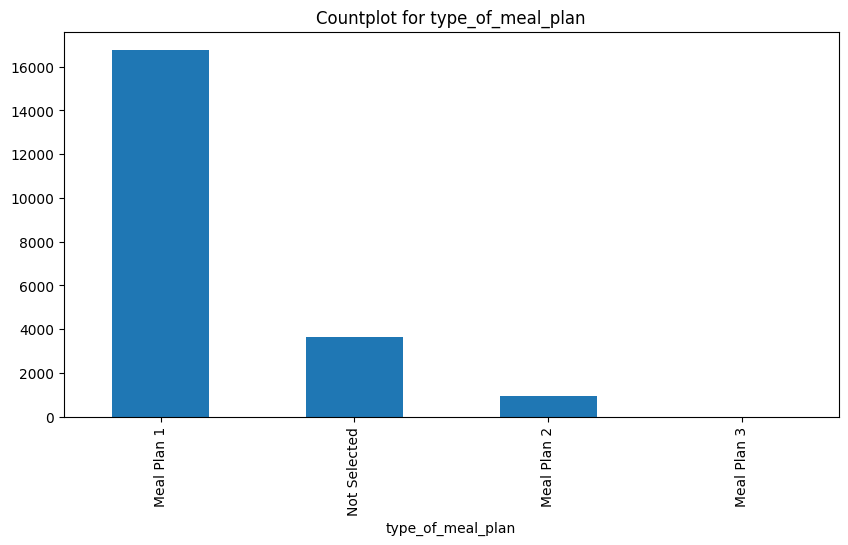



Column name : required_car_parking_space
required_car_parking_space
0    20452
1      907
Name: count, dtype: int64


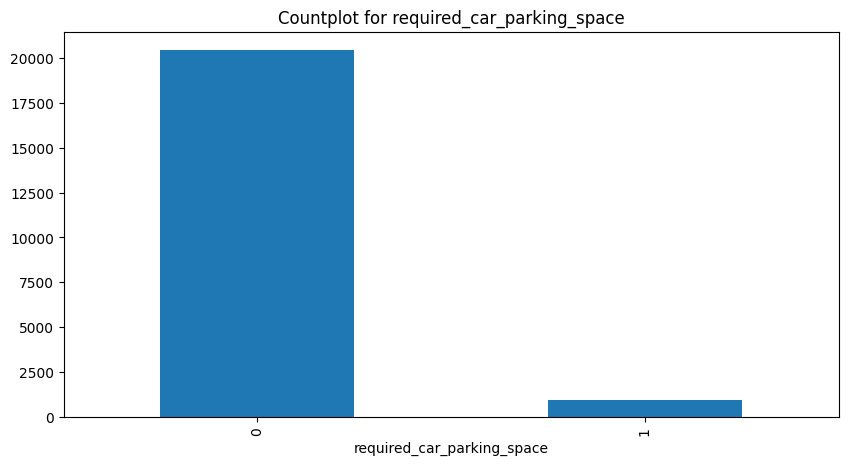



Column name : room_type_reserved
room_type_reserved
Room_Type 1    15375
Room_Type 4     4403
Room_Type 6      758
Room_Type 2      500
Room_Type 5      190
Room_Type 7      129
Room_Type 3        4
Name: count, dtype: int64


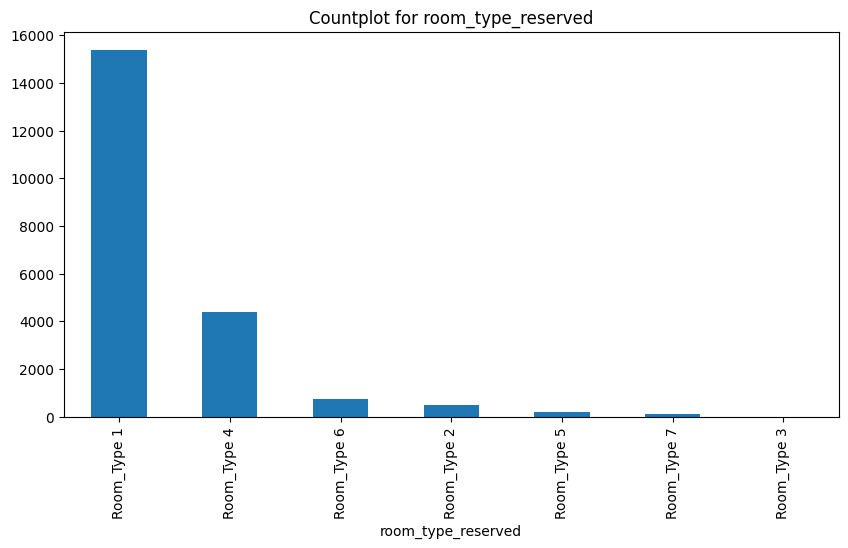



Column name : lead_time


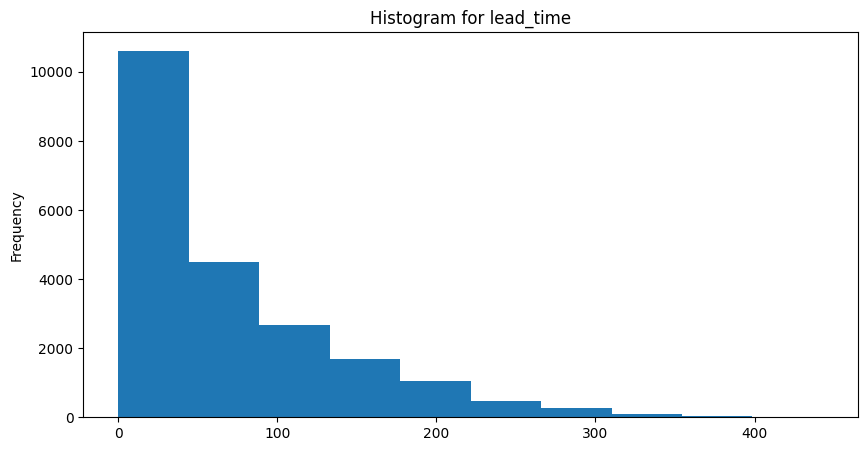



Column name : arrival_year
arrival_year
2018    18141
2017     3218
Name: count, dtype: int64


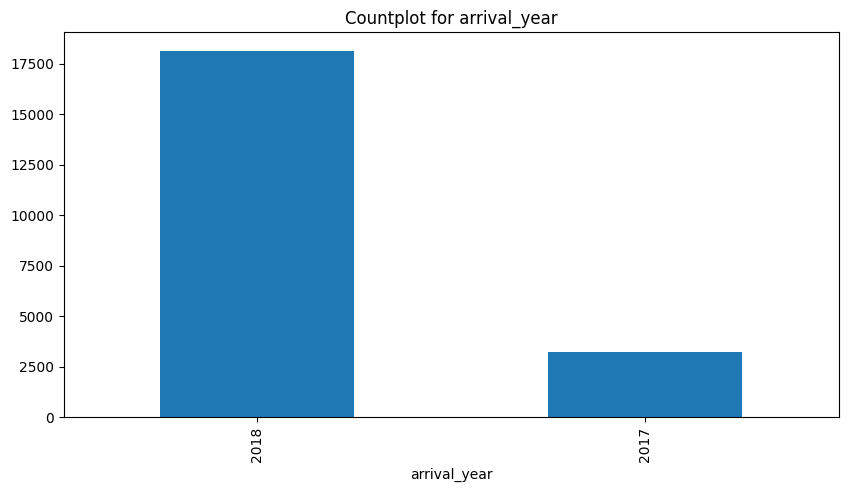



Column name : arrival_month
arrival_month
10    2663
9     2525
8     2477
12    1928
7     1893
11    1817
4     1695
3     1611
6     1543
5     1522
2     1067
1      618
Name: count, dtype: int64


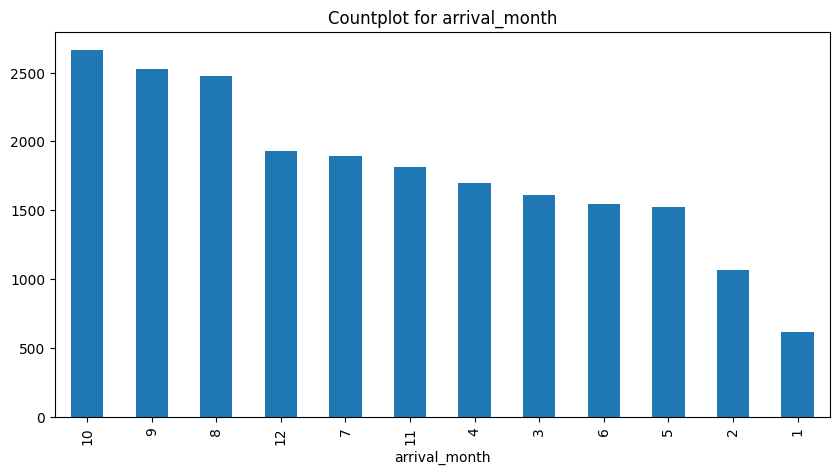



Column name : arrival_date


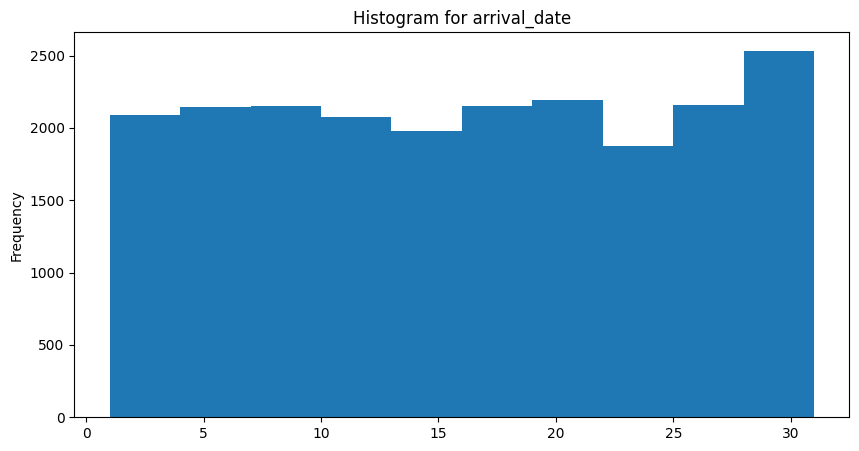



Column name : market_segment_type
market_segment_type
Online           16324
Offline           3471
Corporate         1192
Complementary      291
Aviation            81
Name: count, dtype: int64


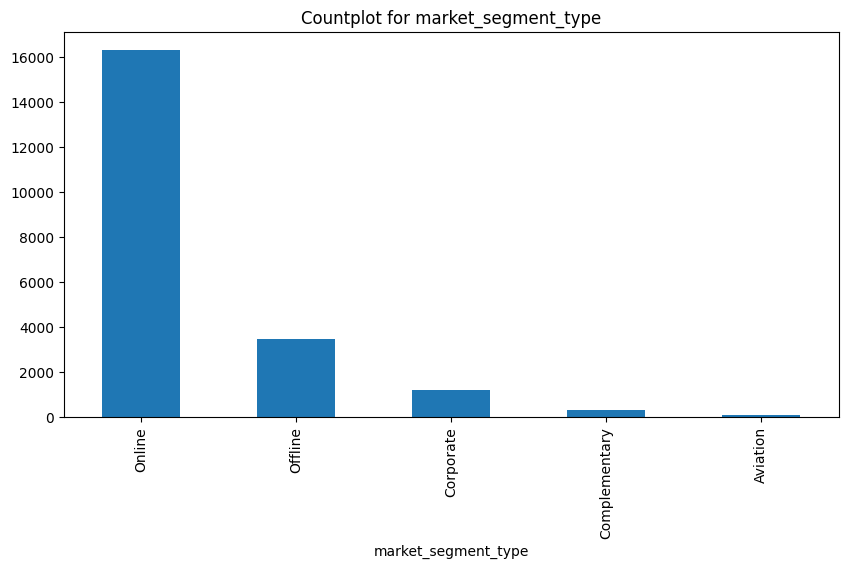



Column name : repeated_guest
repeated_guest
0    20667
1      692
Name: count, dtype: int64


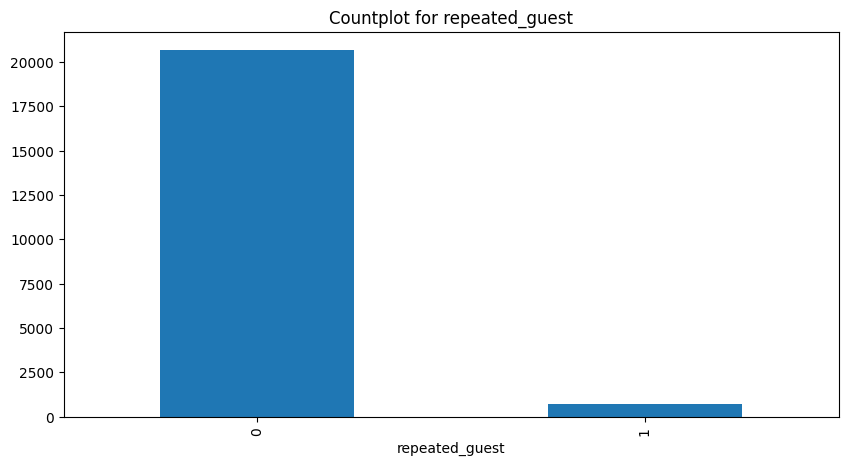



Column name : no_of_previous_cancellations
no_of_previous_cancellations
0     21135
1       115
2        36
3        32
11       20
5        10
4         9
13        1
6         1
Name: count, dtype: int64


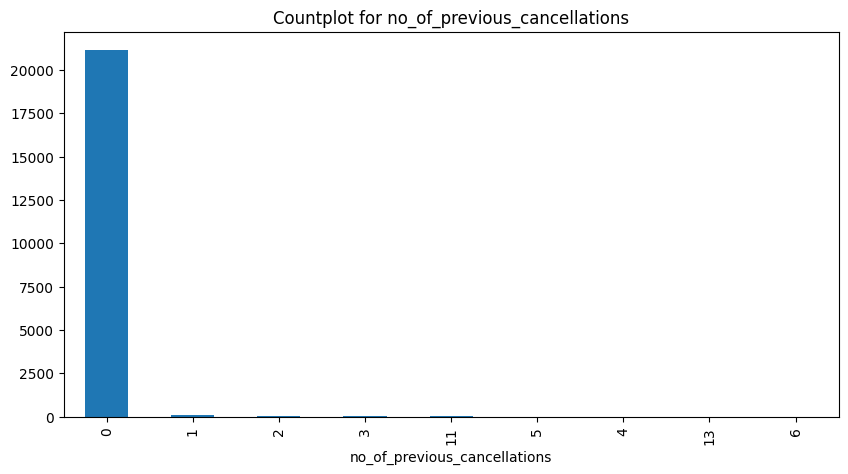



Column name : no_of_previous_bookings_not_canceled


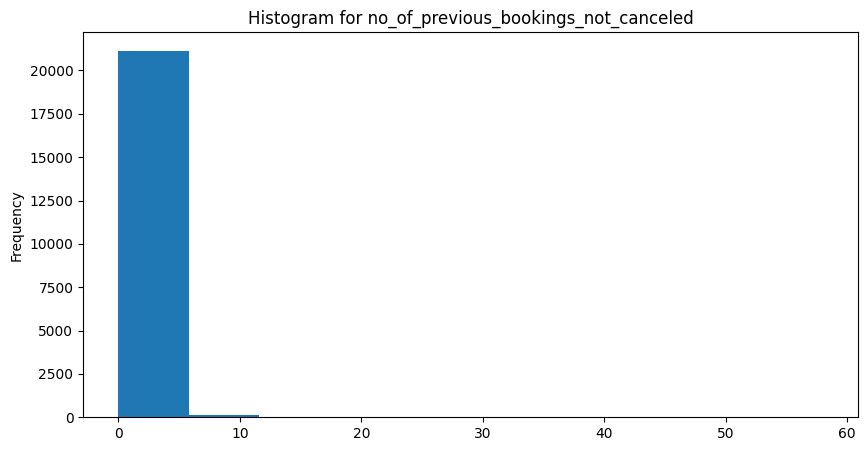



Column name : avg_price_per_room


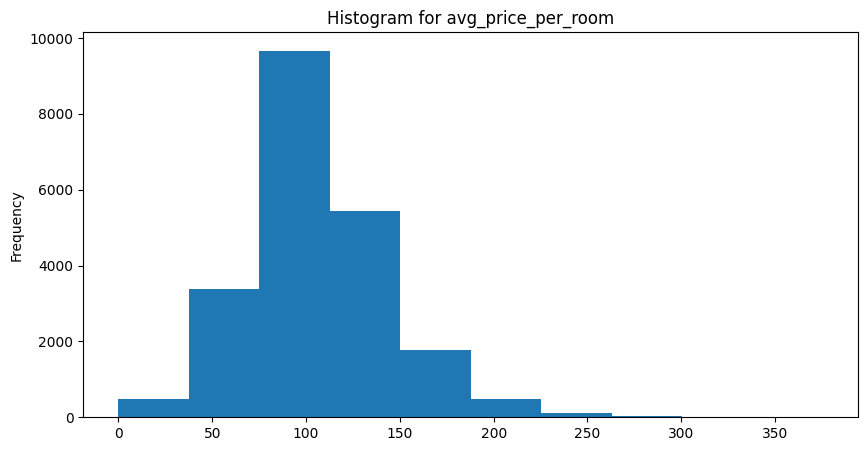



Column name : no_of_special_requests
no_of_special_requests
0    9919
1    7732
2    3154
3     487
4      61
5       6
Name: count, dtype: int64


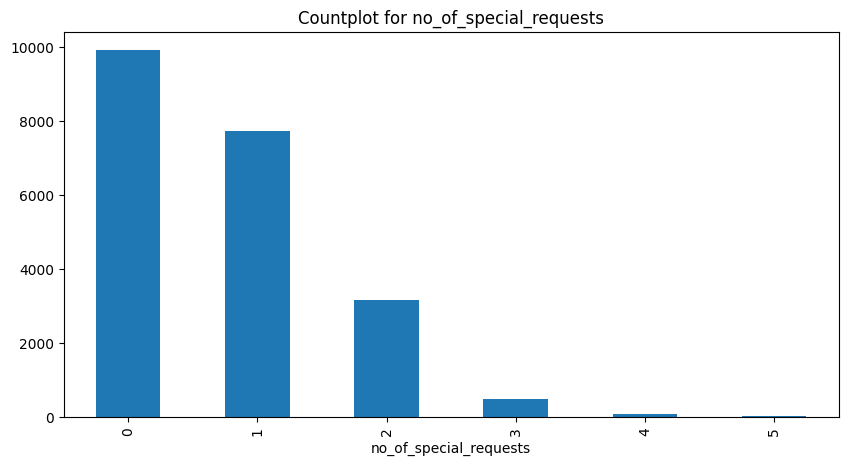



Column name : booking_status
booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64


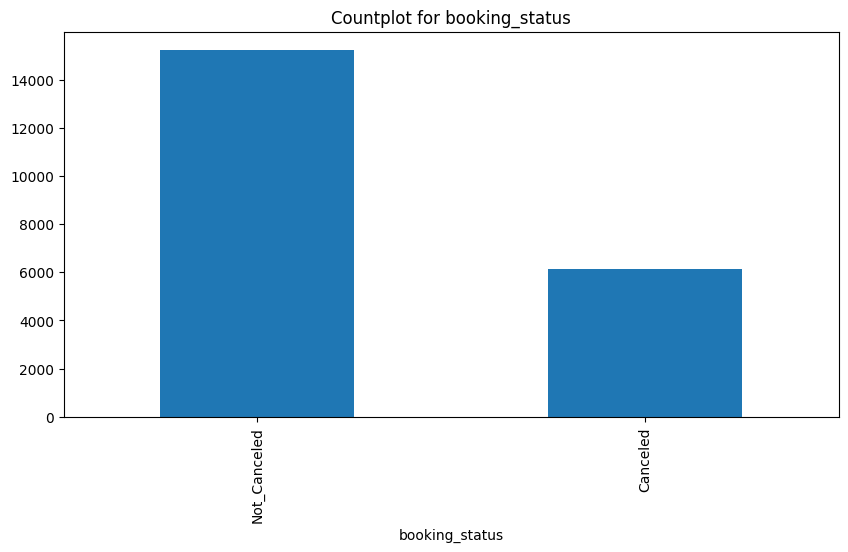

In [15]:
for i in df.columns:
    print(f"Column name : {i}")
    if df[i].nunique() <= 20:
        c = df[i].value_counts()
        print(c)
        c.plot(kind="bar", figsize=(10, 5), title=f"Countplot for {i}")
    else:
        df[i].plot(kind="hist", figsize=(10, 5), title=f"Histogram for {i}")
    plt.show()
    print("\n" + "=" * 100 + "\n")

In [16]:
import seaborn as sns

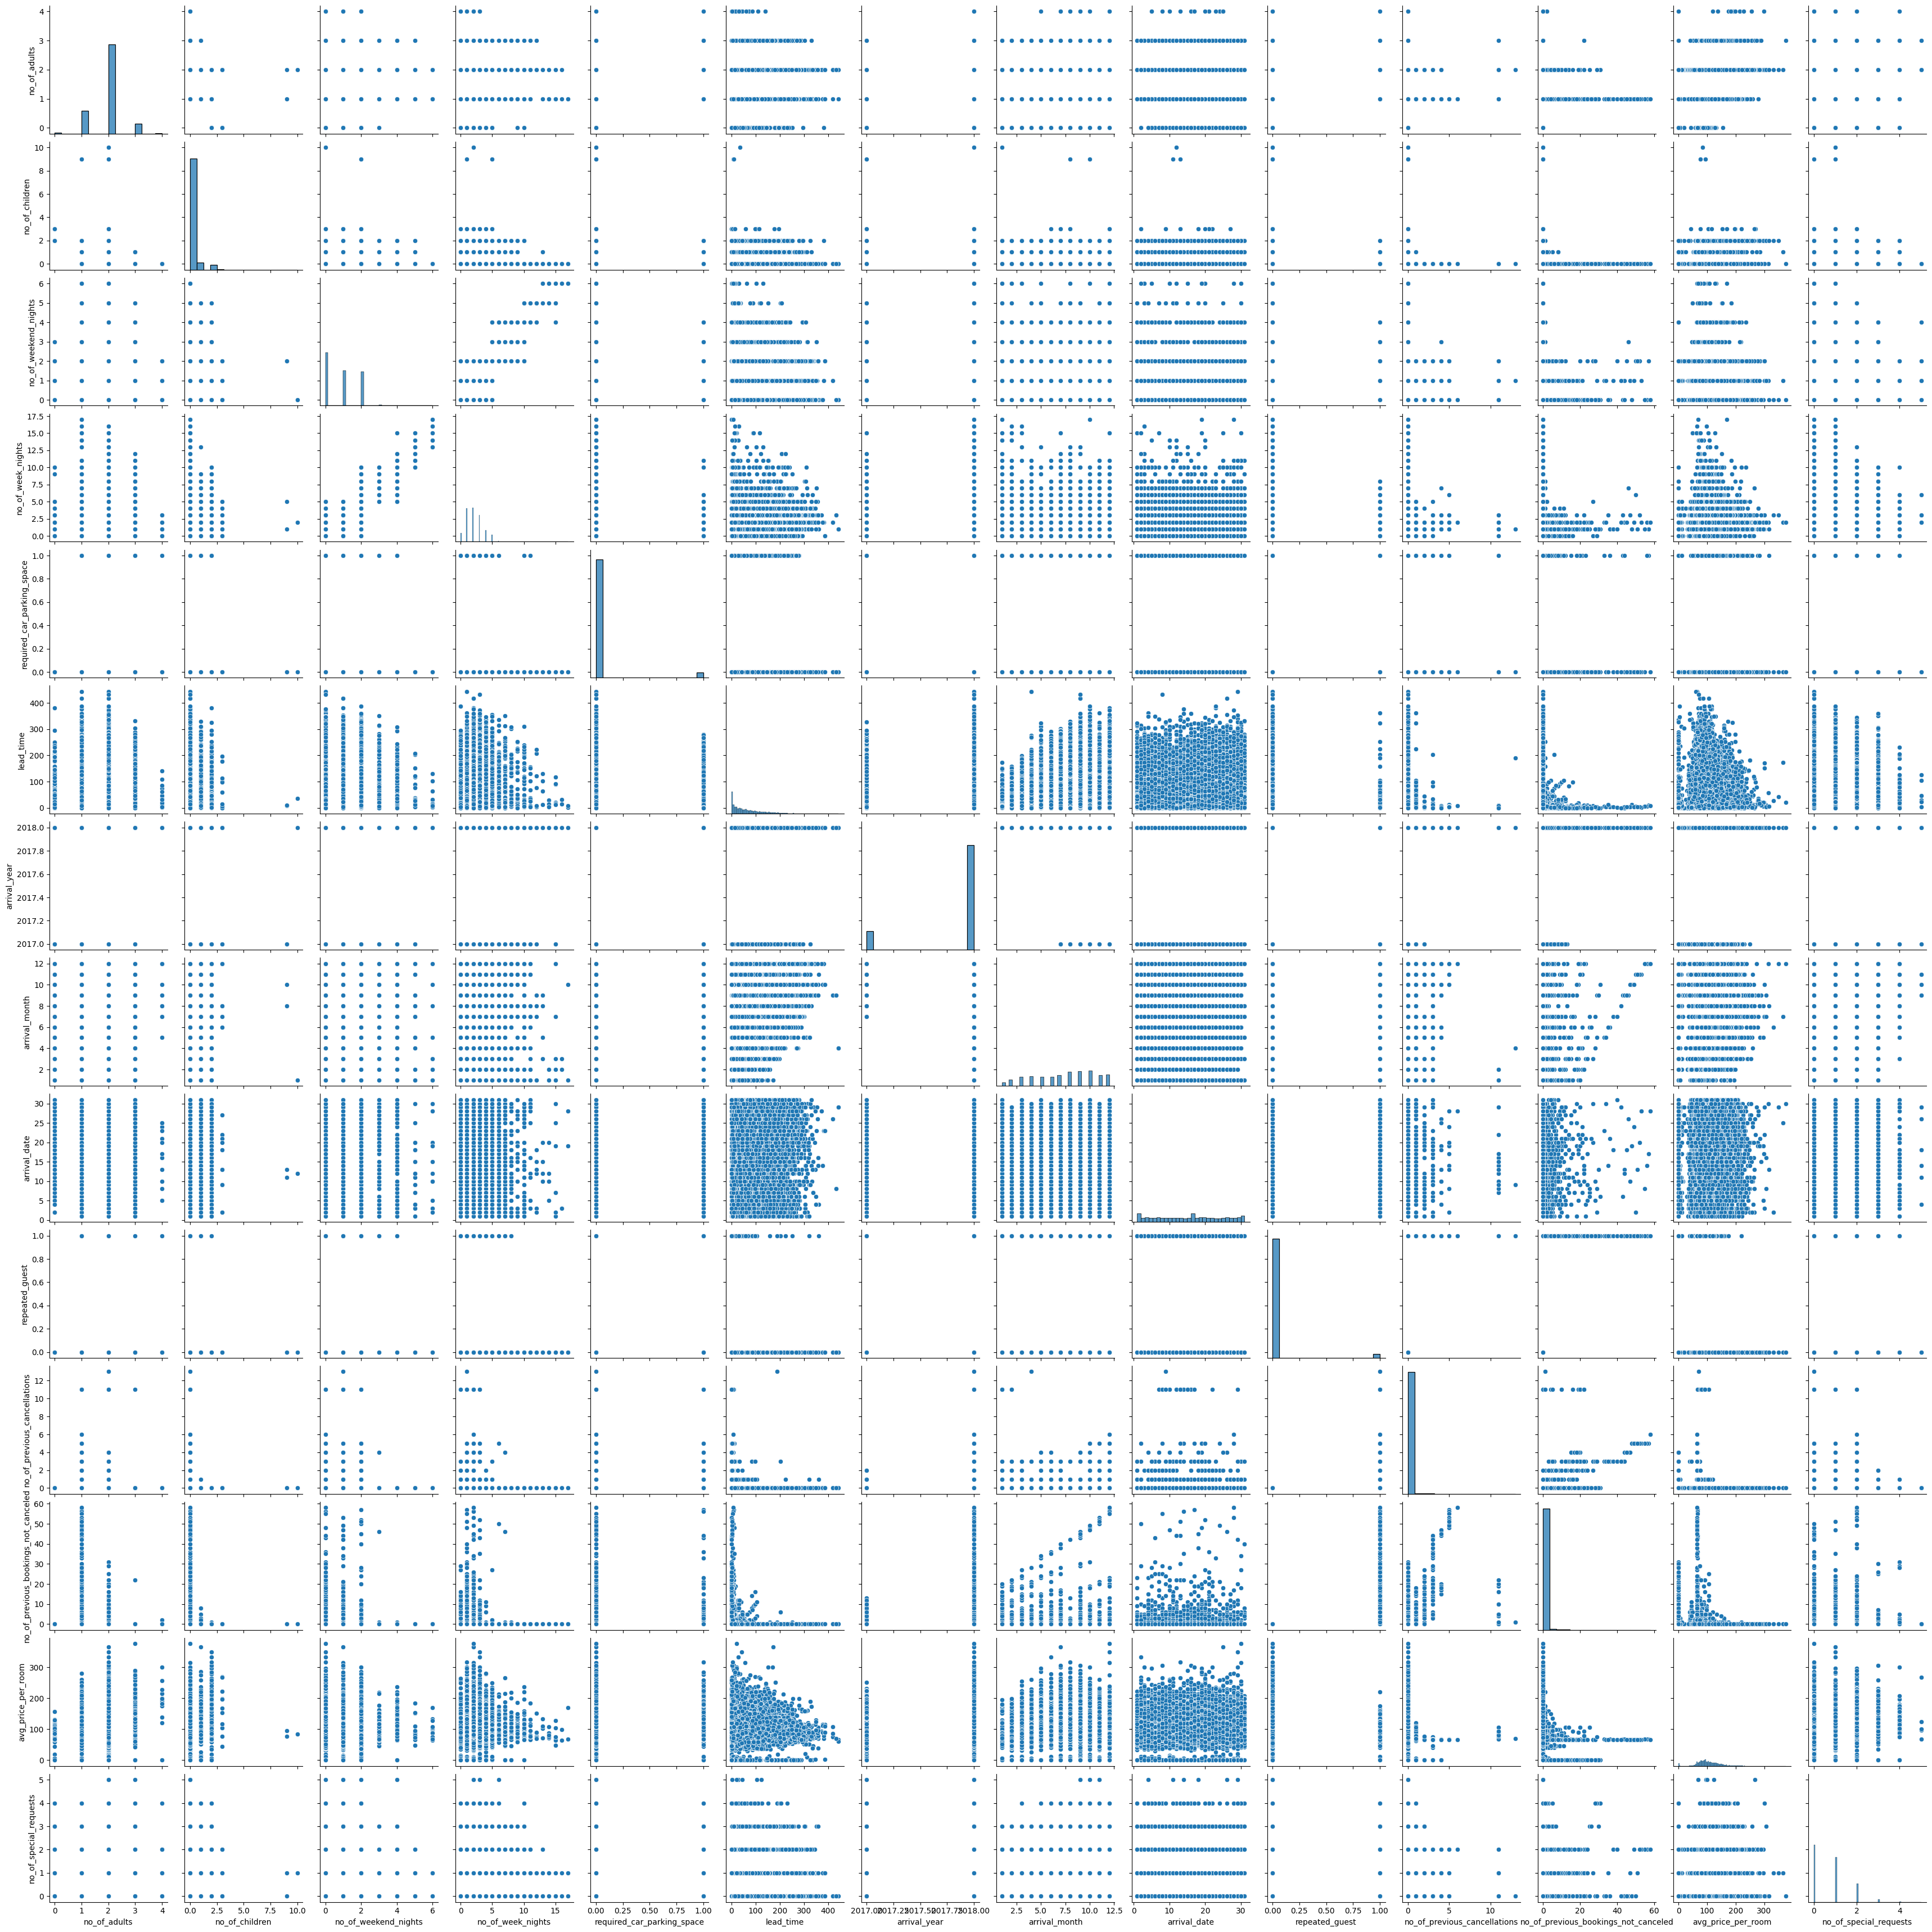

In [17]:
sns.pairplot(df)

In [18]:
cat = df.columns[df.dtypes == "object"]
con = df.columns[df.dtypes != "object"]

In [19]:
cat

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')

In [20]:
con

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [21]:
def boxplot_columns(df, target, num_cols):
    num_plots = len(num_cols)
    num_rows = (num_plots + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    axes = axes.flatten()

    for idx, column in enumerate(num_cols):
        sns.boxplot(x=target, y=column, ax=axes[idx], data=df)
        axes[idx].set_title(f"{column} vs {target}")

    plt.tight_layout()
    plt.show()

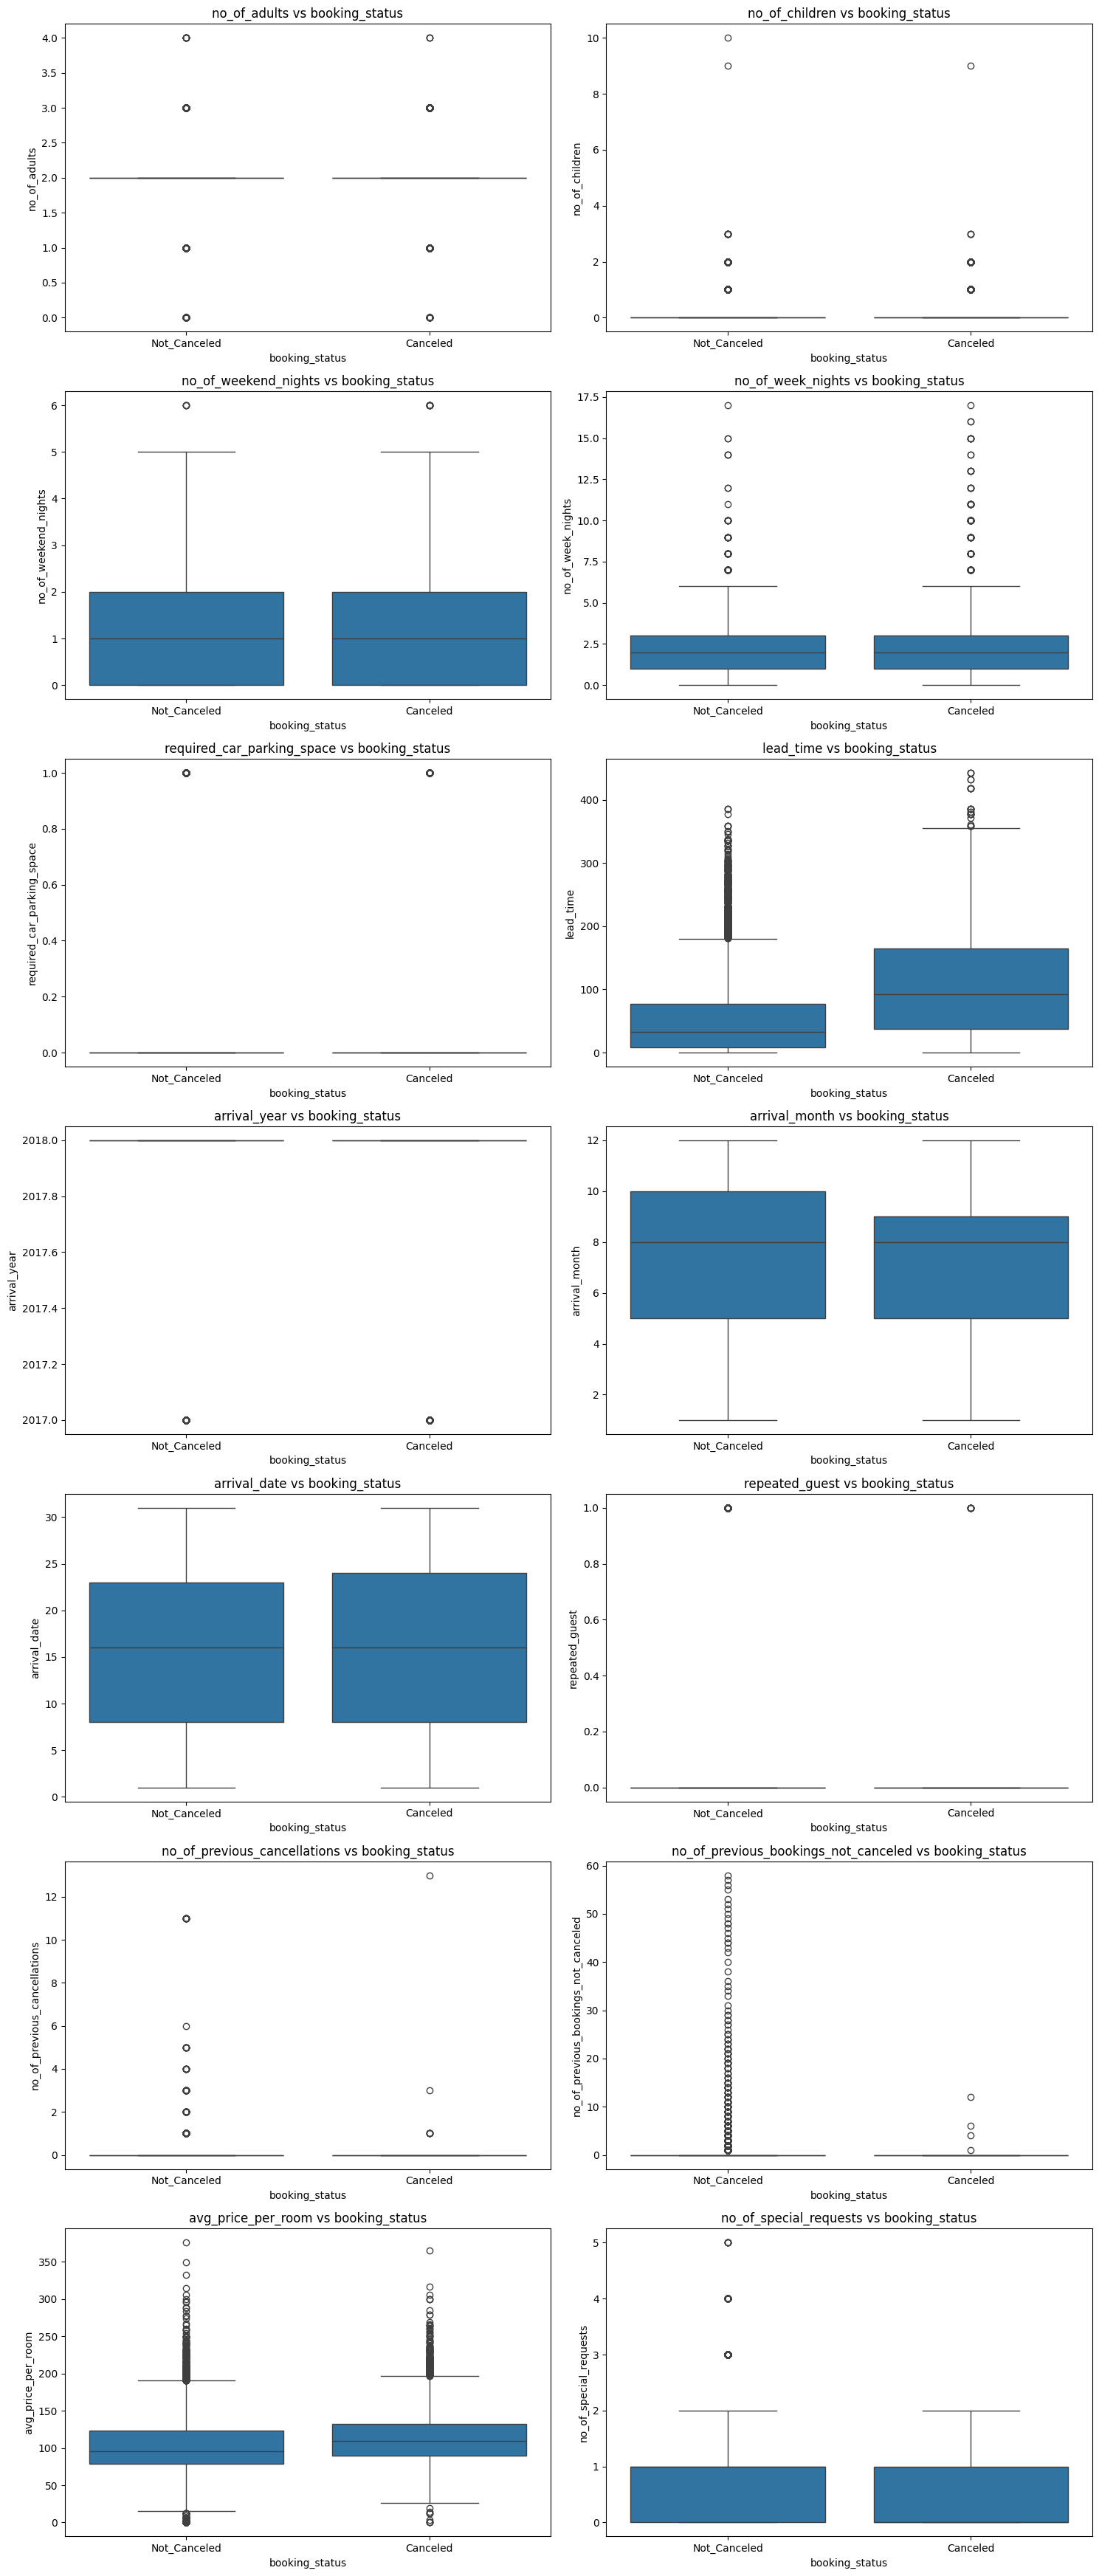

In [22]:
boxplot_columns(df, "booking_status", con)

In [23]:
def plot_bivariate(df, target, cat_features):
    num_features = len(cat_features)
    num_rows = (num_features + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
    axes = axes.flatten()

    for idx, column in enumerate(cat_features):
        sns.countplot(x=column, hue=target, data=df, ax=axes[idx])
        axes[idx].set_title(f"{column} vs {target}")
        axes[idx].tick_params(axis="x", rotation=90)

    plt.tight_layout()
    plt.show()

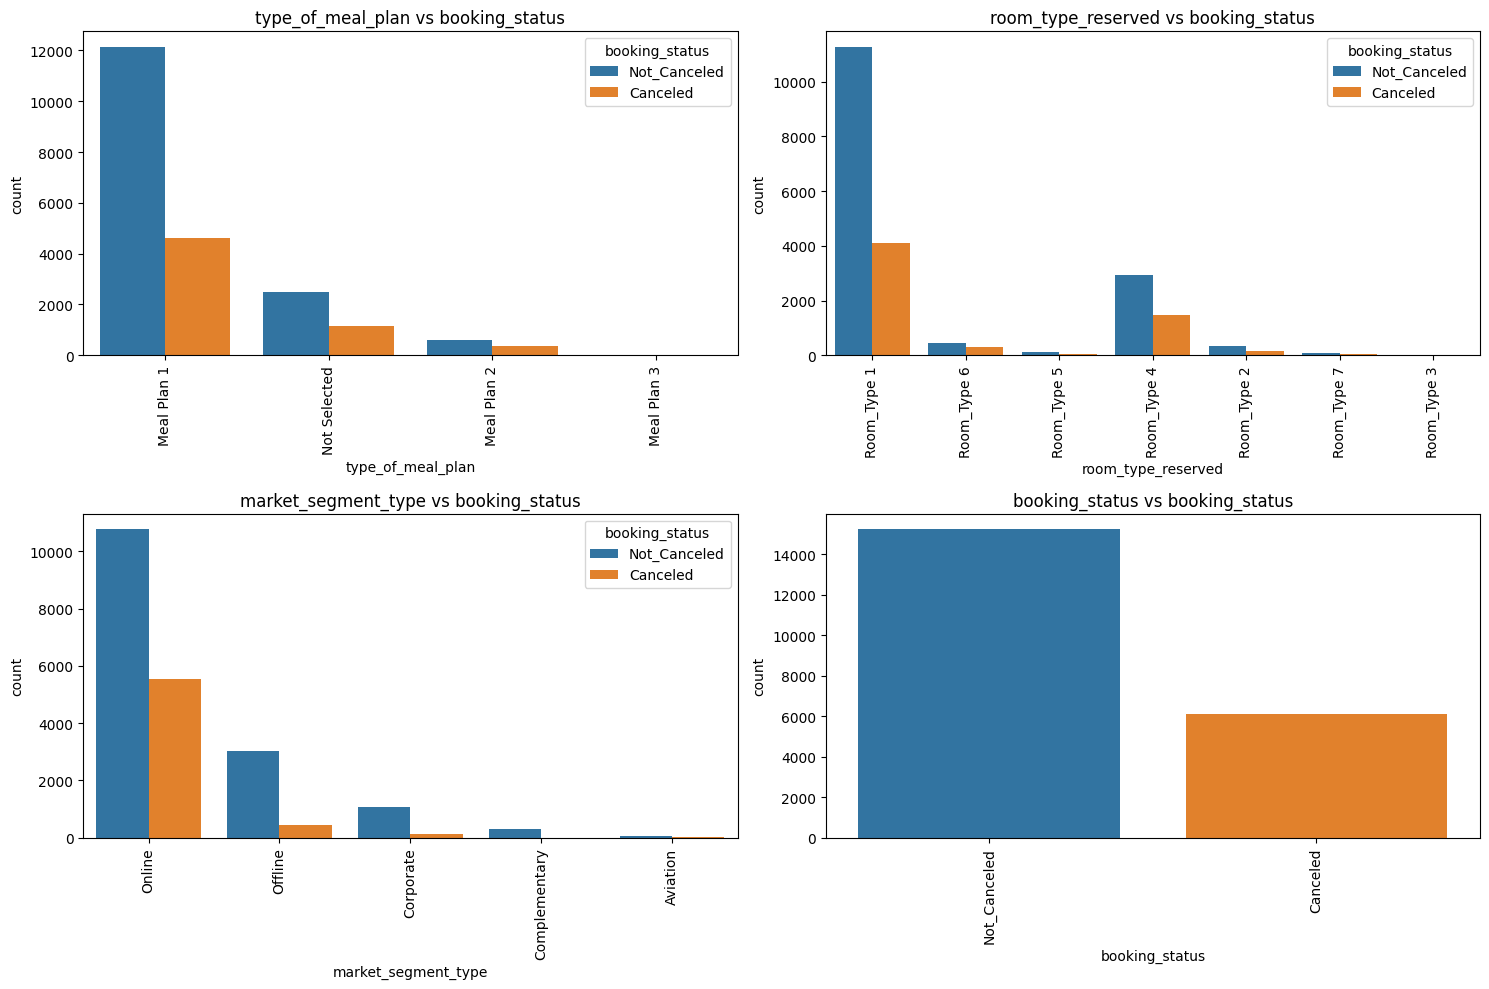

In [24]:
plot_bivariate(df, "booking_status", cat)

## Seperate X and Y


In [25]:
xtrain = df.drop(columns=["booking_status"])
ytrain = df[["booking_status"]]

In [26]:
xtrain.shape

(21359, 17)

In [27]:
ytrain.shape

(21359, 1)

In [28]:
cat = list(xtrain.columns[xtrain.dtypes == "object"])
con = list(xtrain.columns[xtrain.dtypes != "object"])

In [29]:
cat

['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

In [30]:
con

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [32]:
num_pipe = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [33]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"), OrdinalEncoder(), StandardScaler()
)

In [34]:
pre = ColumnTransformer([("num", num_pipe, con), ("cat", cat_pipe, cat)]).set_output(
    transform="pandas"
)

In [35]:
xtrain_pre = pre.fit_transform(xtrain)

In [36]:
xtrain_pre.head()

,num__no_of_adults,num__no_of_children,num__no_of_weekend_nights,num__no_of_week_nights,num__required_car_parking_space,num__lead_time,num__arrival_year,num__arrival_month,num__arrival_date,num__repeated_guest,num__no_of_previous_cancellations,num__no_of_previous_bookings_not_canceled,num__avg_price_per_room,num__no_of_special_requests,cat__type_of_meal_plan,cat__room_type_reserved,cat__market_segment_type
0,0.216834,1.863765,1.272077,-0.837055,-0.210589,-0.597339,-2.374311,0.850451,0.140572,-0.182985,-0.069836,-0.101218,1.470307,-0.905609,-0.493378,-0.583813,0.486789
1,0.216834,1.863765,0.140359,-0.837055,-0.210589,0.441800,0.421175,-0.108754,0.027667,-0.182985,-0.069836,-0.101218,0.423265,1.546740,-0.493378,-0.583813,0.486789
2,0.216834,-0.303609,-0.991360,0.499117,-0.210589,5.276685,0.421175,0.530716,-0.875571,-0.182985,-0.069836,-0.101218,-0.941866,-0.905609,-0.493378,-0.583813,-0.987591
3,0.216834,-0.303609,1.272077,1.835290,-0.210589,1.841752,0.421175,0.210981,-0.875571,-0.182985,-0.069836,-0.101218,-0.882224,-0.905609,-0.493378,-0.583813,-0.987591
4,-1.675060,-0.303609,-0.991360,-0.168969,-0.210589,1.740725,0.421175,-0.428489,-0.085238,-0.182985,-0.069836,-0.101218,0.648578,-0.905609,-0.493378,-0.583813,-0.987591


## Imbalance fix


In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
smote = SMOTE(random_state=42)

xtrain_res, ytrain_res = smote.fit_resample(xtrain_pre, ytrain)

In [39]:
ytrain_res.value_counts()

booking_status
Canceled          15231
Not_Canceled      15231
Name: count, dtype: int64

### Model training


In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
model = RandomForestClassifier(random_state=42)
model.fit(xtrain_res.values, ytrain_res.values.flatten())

RandomForestClassifier(random_state=42)

In [42]:
model.score(xtrain_res.values, ytrain_res.values.flatten())

0.9965530825290526

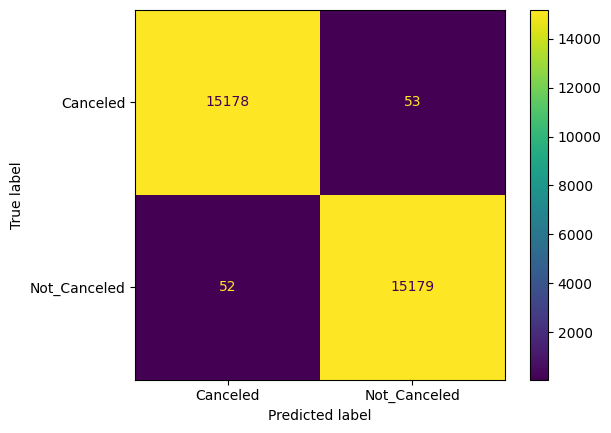

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    model, xtrain_res.values, ytrain_res.values.flatten()
)

plt.show()

In [44]:
from sklearn.model_selection import cross_val_score

In [50]:
scores = cross_val_score(model, xtrain_res, ytrain_res, cv=5, scoring="f1_macro")

In [51]:
scores

array([0.84372114, 0.83399129, 0.93029769, 0.92961174, 0.93306632])

In [52]:
scores.mean()

np.float64(0.8941376357379145)

In [53]:
ypred_train = model.predict(xtrain_res)
ypred_train[0:5]

array(['Not_Canceled', 'Not_Canceled', 'Canceled', 'Not_Canceled',
       'Canceled'], dtype=object)

In [54]:
ytrain_res.head()

,booking_status
0,Not_Canceled
1,Not_Canceled
2,Canceled
3,Not_Canceled
4,Canceled


In [55]:
from sklearn.metrics import classification_report

print(classification_report(ytrain_res, ypred_train))

              precision    recall  f1-score   support

    Canceled       1.00      1.00      1.00     15231
Not_Canceled       1.00      1.00      1.00     15231

    accuracy                           1.00     30462
   macro avg       1.00      1.00      1.00     30462
weighted avg       1.00      1.00      1.00     30462



## Test


In [56]:
df_new = pd.read_csv("test.csv")
df_new.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN04969,2,1,1,0,Meal Plan 1,0,Room_Type 1,3,2017,8,23,Online,0,0,0,90.00,3,Not_Canceled
1,INN34541,2,0,1,2,Meal Plan 1,0,Room_Type 4,9,2018,2,12,Offline,0,0,0,48.67,0,Not_Canceled
2,INN36109,2,0,2,2,Meal Plan 1,0,Room_Type 1,24,2018,12,25,Online,0,0,0,95.20,1,Not_Canceled
3,INN01554,2,0,0,3,Meal Plan 1,0,Room_Type 1,23,2018,6,21,Online,0,0,0,127.67,0,Canceled
4,INN24975,2,1,0,2,Meal Plan 1,0,Room_Type 4,9,2018,9,8,Online,0,0,0,201.50,2,Not_Canceled


In [57]:
xtest = df_new.drop(columns=["Booking_ID", "booking_status"])
ytest = df_new[["booking_status"]]

In [58]:
xtest.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,1,1,0,Meal Plan 1,0,Room_Type 1,3,2017,8,23,Online,0,0,0,90.00,3
1,2,0,1,2,Meal Plan 1,0,Room_Type 4,9,2018,2,12,Offline,0,0,0,48.67,0
2,2,0,2,2,Meal Plan 1,0,Room_Type 1,24,2018,12,25,Online,0,0,0,95.20,1
3,2,0,0,3,Meal Plan 1,0,Room_Type 1,23,2018,6,21,Online,0,0,0,127.67,0
4,2,1,0,2,Meal Plan 1,0,Room_Type 4,9,2018,9,8,Online,0,0,0,201.50,2


In [59]:
ytest.head()

,booking_status
0,Not_Canceled
1,Not_Canceled
2,Not_Canceled
3,Canceled
4,Not_Canceled


In [60]:
xtest_pre = pre.transform(xtest)
xtest_pre.head()

,num__no_of_adults,num__no_of_children,num__no_of_weekend_nights,num__no_of_week_nights,num__required_car_parking_space,num__lead_time,num__arrival_year,num__arrival_month,num__arrival_date,num__repeated_guest,num__no_of_previous_cancellations,num__no_of_previous_bookings_not_canceled,num__avg_price_per_room,num__no_of_special_requests,cat__type_of_meal_plan,cat__room_type_reserved,cat__market_segment_type
0,0.216834,1.863765,0.140359,-1.505141,-0.210589,-0.929287,-2.374311,0.210981,0.818000,-0.182985,-0.069836,-0.101218,-0.411718,2.772915,-0.493378,-0.583813,0.486789
1,0.216834,-0.303609,0.140359,-0.168969,-0.210589,-0.842692,0.421175,-1.707429,-0.423952,-0.182985,-0.069836,-0.101218,-1.507269,-0.905609,-0.493378,1.380842,-0.987591
2,0.216834,-0.303609,1.272077,-0.168969,-0.210589,-0.626204,0.421175,1.489921,1.043810,-0.182985,-0.069836,-0.101218,-0.273879,0.320566,-0.493378,-0.583813,0.486789
3,0.216834,-0.303609,-0.991360,0.499117,-0.210589,-0.640637,0.421175,-0.428489,0.592191,-0.182985,-0.069836,-0.101218,0.586816,-0.905609,-0.493378,-0.583813,0.486789
4,0.216834,1.863765,-0.991360,-0.168969,-0.210589,-0.842692,0.421175,0.530716,-0.875571,-0.182985,-0.069836,-0.101218,2.543857,1.546740,-0.493378,1.380842,0.486789


In [61]:
ypred_test = model.predict(xtest_pre)

In [62]:
ypred_test[0:5]

array(['Not_Canceled', 'Not_Canceled', 'Not_Canceled', 'Canceled',
       'Not_Canceled'], dtype=object)

In [63]:
ytest.head()

,booking_status
0,Not_Canceled
1,Not_Canceled
2,Not_Canceled
3,Canceled
4,Not_Canceled


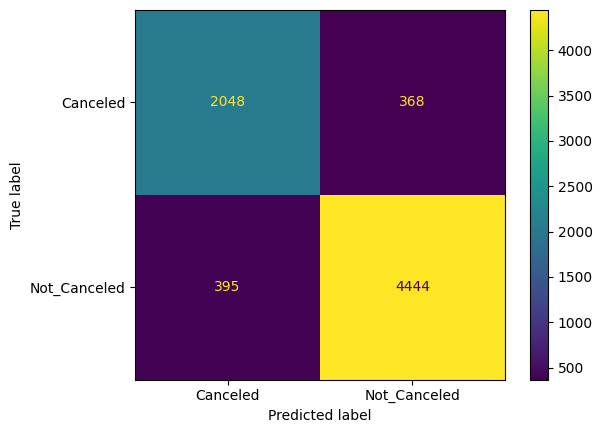

In [66]:
ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)
plt.show()

In [67]:
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

    Canceled       0.84      0.85      0.84      2416
Not_Canceled       0.92      0.92      0.92      4839

    accuracy                           0.89      7255
   macro avg       0.88      0.88      0.88      7255
weighted avg       0.90      0.89      0.89      7255



In [68]:
imp = pd.Series(model.feature_importances_, index=xtrain.columns)
imp

no_of_adults                            0.017562
no_of_children                          0.007288
no_of_weekend_nights                    0.033728
no_of_week_nights                       0.067183
type_of_meal_plan                       0.009947
required_car_parking_space              0.260328
room_type_reserved                      0.019958
lead_time                               0.099890
arrival_year                            0.085566
arrival_month                           0.002885
arrival_date                            0.000183
market_segment_type                     0.001653
repeated_guest                          0.134748
no_of_previous_cancellations            0.153810
no_of_previous_bookings_not_canceled    0.015645
avg_price_per_room                      0.016690
no_of_special_requests                  0.072935
dtype: float64

In [69]:
imp.sort_values(ascending=False)

required_car_parking_space              0.260328
no_of_previous_cancellations            0.153810
repeated_guest                          0.134748
lead_time                               0.099890
arrival_year                            0.085566
no_of_special_requests                  0.072935
no_of_week_nights                       0.067183
no_of_weekend_nights                    0.033728
room_type_reserved                      0.019958
no_of_adults                            0.017562
avg_price_per_room                      0.016690
no_of_previous_bookings_not_canceled    0.015645
type_of_meal_plan                       0.009947
no_of_children                          0.007288
arrival_month                           0.002885
market_segment_type                     0.001653
arrival_date                            0.000183
dtype: float64

<Axes: title={'center': 'Feature Importances'}>

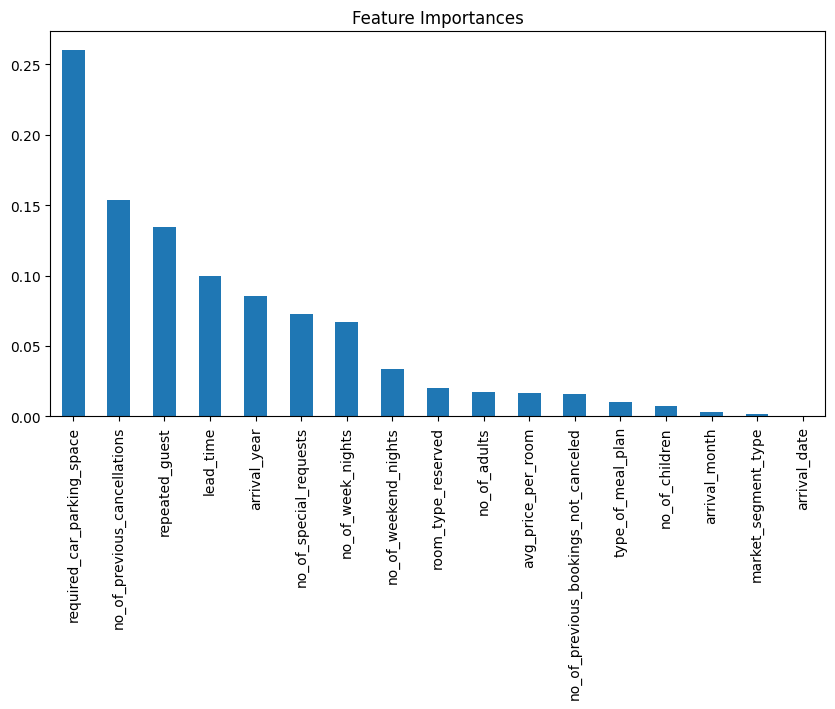

In [ ]:
imp.sort_values(ascending=False).plot(
    kind="bar", figsize=(10, 5), title="Feature Importances"
)

## Testing different models


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
)
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [82]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    HistGradientBoostingClassifier(random_state=42),
    XGBClassifier(random_state=42),
    GaussianNB(),
]

In [83]:
def evaluate_single_model(model, xtrain, ytrain):
    name = type(model).__name__
    try:
        model.fit(xtrain, ytrain)
        cv_score = (
            cross_val_score(model, xtrain, ytrain, cv=5, scoring="f1_macro", n_jobs=-1)
            .mean()
            .round(4)
        )
        return {"name": name, "model": model, "cv_score": cv_score}
    except Exception as e:
        print(f"Failed to train {name}")

In [84]:
def evaluate_multiple(models, xtrain, ytrain):
    res = []
    for model in models:
        r = evaluate_single_model(model, xtrain, ytrain)
        if r != None:
            print(r)
            res.append(r)
    res_df = pd.DataFrame(res)
    res_df = res_df.sort_values(by="cv_score", ascending=False).reset_index(drop=True)
    best_model = res_df.loc[0, "model"]
    return best_model, res_df

In [86]:
best_model, res_df = evaluate_multiple(
    models, xtrain_res.values, ytrain_res.values.flatten()
)

{'name': 'LogisticRegression', 'model': LogisticRegression(), 'cv_score': np.float64(0.7771)}
{'name': 'DecisionTreeClassifier', 'model': DecisionTreeClassifier(random_state=42), 'cv_score': np.float64(0.8414)}
{'name': 'RandomForestClassifier', 'model': RandomForestClassifier(random_state=42), 'cv_score': np.float64(0.8941)}
{'name': 'GradientBoostingClassifier', 'model': GradientBoostingClassifier(random_state=42), 'cv_score': np.float64(0.8448)}
{'name': 'HistGradientBoostingClassifier', 'model': HistGradientBoostingClassifier(random_state=42), 'cv_score': np.float64(0.8795)}
Failed to train XGBClassifier
{'name': 'GaussianNB', 'model': GaussianNB(), 'cv_score': np.float64(0.4944)}


In [87]:
best_model

RandomForestClassifier(random_state=42)

In [88]:
res_df

,name,model,cv_score
0,RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...",0.8941
1,HistGradientBoostingClassifier,HistGradientBoostingClassifier(random_state=42),0.8795
2,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,0.8448
3,DecisionTreeClassifier,DecisionTreeClassifier(random_state=42),0.8414
4,LogisticRegression,LogisticRegression(),0.7771
5,GaussianNB,GaussianNB(),0.4944


### Hyperparameter tuning of best model


In [96]:
from scipy.stats import randint

In [97]:
rf = RandomForestClassifier(random_state=42)

In [98]:
params = {
    "n_estimators": randint(100, 500),
    "max_depth": randint(4, 20),
    "min_samples_split": randint(5, 10),
    "min_samples_leaf": randint(5, 10),
    "bootstrap": [True, False],
}

In [99]:
from sklearn.model_selection import RandomizedSearchCV

In [100]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params,
    scoring="f1_macro",
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42,
)

random_search.fit(xtrain_res, ytrain_res)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002C50AFC9010>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002C50AFEF8A0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002C50AFEF460>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002C5116C43E0>},
                   random_state=42, scoring='f1_macro', verbose=2)

In [101]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 17,
 'min_samples_leaf': 6,
 'min_samples_split': 8,
 'n_estimators': 376}

In [102]:
random_search.best_score_

np.float64(0.8763417437656038)

In [103]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=17, min_samples_leaf=6,
                       min_samples_split=8, n_estimators=376, random_state=42)

In [107]:
import joblib

In [108]:
joblib.dump(best_model, "rf_model.joblib")

['rf_model.joblib']

In [109]:
joblib.dump(pre, "pre.joblib")

['pre.joblib']